In [2]:
import pandas as pd;
from matplotlib import pyplot as plt;
import seaborn;

data=pd.read_csv("dds_ch2_nyt/nyt1.csv")
age_groups=["<18","18-24","25-34","35-44","45-54","55-64","65+"]
data

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
458436,0,0,2,0,0
458437,0,0,4,0,0
458438,72,1,5,0,1
458439,0,0,5,0,0


In [4]:
dataNoNullAge=data[(data.Age>0) & (data.Signed_In==1)]
dataNoNullAge

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
458432,30,0,4,0,1
458433,21,1,2,0,1
458434,61,1,6,0,1
458435,51,0,7,0,1


<AxesSubplot: >

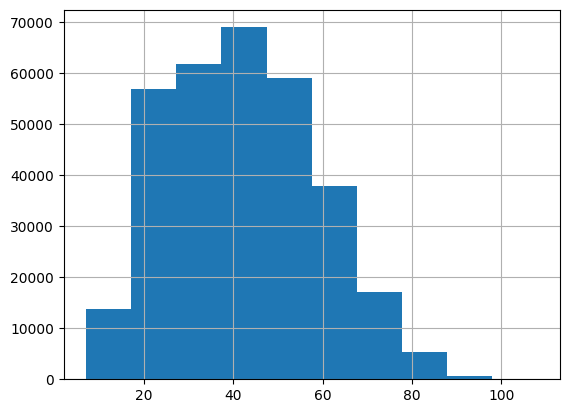

In [20]:
dataNoNullAge.Age.hist()

In [5]:
def ages(age):
    if(age<18):
        return "<18";
    elif(age<25):
        return "18-24";
    elif(age<35):
        return "25-34";
    elif(age<45):
        return "35-44";
    elif(age<55):
        return "45-54";
    elif(age<65):
        return "55-64";
    else:
        return "65+";

dataNoNullAge["Age_group"]=dataNoNullAge.Age.apply(lambda x: ages(x))
dataNoNullAge

/tmp/ipykernel_52572/3178081111.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNoNullAge["Age_group"]=dataNoNullAge.Age.apply(lambda x: ages(x))


,Age,Gender,Impressions,Clicks,Signed_In,Age_group
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54
...,...,...,...,...,...,...
458432,30,0,4,0,1,25-34
458433,21,1,2,0,1,18-24
458434,61,1,6,0,1,55-64
458435,51,0,7,0,1,45-54


In [6]:
groupedData=dataNoNullAge.groupby("Age_group")
ctrData=groupedData[["Clicks","Impressions"]].mean()
ctrData["CTR"] = ctrData.Clicks / ctrData.Impressions
ctrData["CTR"]

Age_group
18-24    0.010644
25-34    0.010110
35-44    0.010292
45-54    0.010034
55-64    0.020277
65+      0.030183
<18      0.029824
Name: CTR, dtype: float64

<AxesSubplot: ylabel='CTR'>

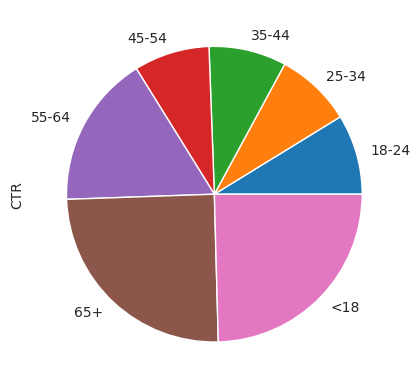

In [9]:
ctrData["CTR"].plot(kind="pie")

<AxesSubplot: xlabel='Стать (0-жінка, 1-чоловік)', ylabel='Кількість'>

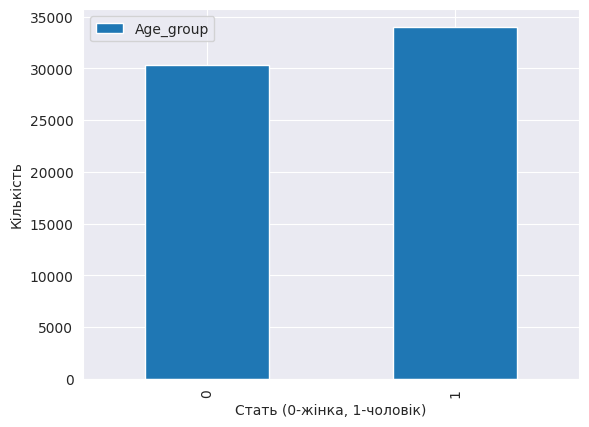

In [19]:
def genderComparer(ageGroup):
    gendersComparator=dataNoNullAge.loc[dataNoNullAge["Age_group"]==ageGroup]
    gendersComparator=gendersComparator[["Age_group","Gender"]].groupby("Gender").count()
    return gendersComparator;
genders=[]
for i in range(len(age_groups)):
    genders.append(genderComparer(age_groups[i]))
genders[4].plot(kind="bar", xlabel="Стать (0-жінка, 1-чоловік)",ylabel="Кількість")

<AxesSubplot: xlabel='Age_group', ylabel='impression'>

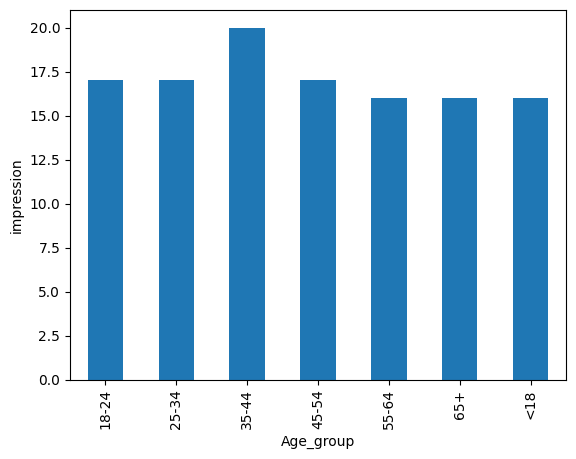

In [91]:
maxImpressions=groupedData.Impressions.max()
maxImpressions.plot(kind='bar',ylabel='impression')

<AxesSubplot: xlabel='вікова група', ylabel='median of impressions'>

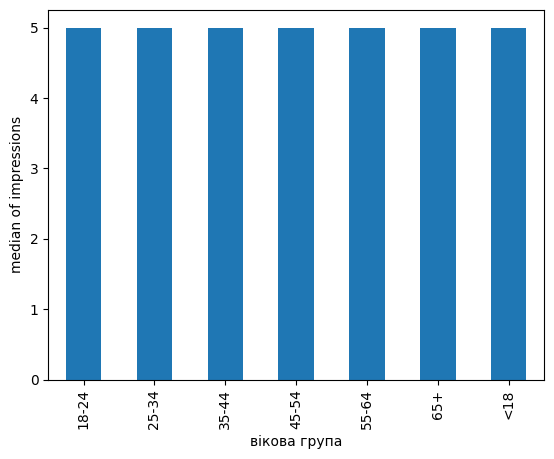

In [104]:
medianImpressions=groupedData["Impressions"].median()
medianImpressions.plot(kind='bar',xlabel="вікова група",ylabel='median of impressions')

<AxesSubplot: xlabel='Вікова група', ylabel='mean impressions'>

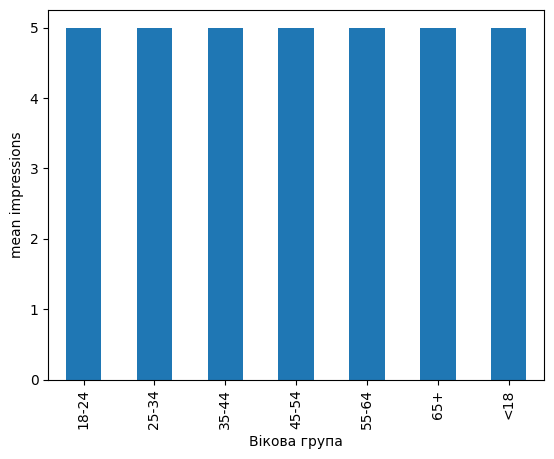

In [94]:
meanImpressions=groupedData["Impressions"].mean()
medianImpressions.plot(kind='bar',xlabel='Вікова група',ylabel='mean impressions')

<AxesSubplot: xlabel='Вікова група', ylabel='dispersion of impressions'>

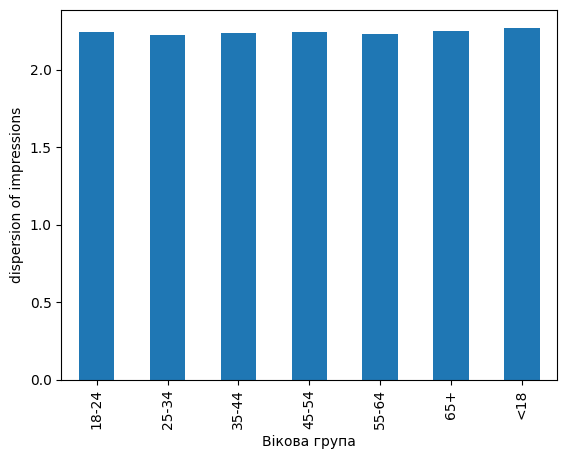

In [29]:
dispImpressions=groupedData["Impressions"].std()
dispImpressions.plot(xlabel="Вікова група",ylabel="dispersion of impressions",kind='bar')

<AxesSubplot: ylabel='кліків'>

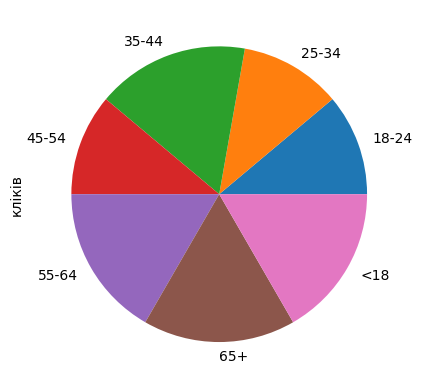

In [30]:
maxClicks=groupedData.Clicks.max()
maxClicks.plot(kind='pie',ylabel="кліків")

<AxesSubplot: ylabel='кліків'>

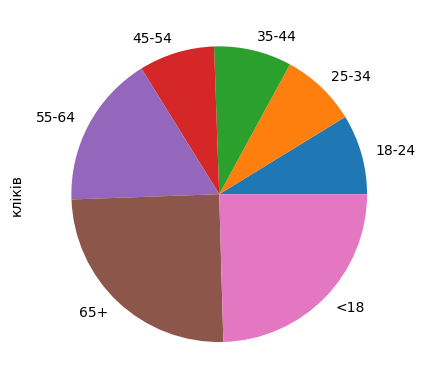

In [116]:
meanClicks=groupedData.Clicks.mean()
meanClicks.plot(ylabel='кліків',kind='pie')

In [32]:
finalFrame=meanImpressions.to_frame()
finalFrame["CTR"]=ctrData["CTR"]
finalFrame["median impressions"]=medianImpressions
finalFrame["max impressions"]=maxImpressions
finalFrame["dispersion impressions"]=dispImpressions
finalFrame["max clicks"]=maxClicks
finalFrame["mean clicks"]=meanClicks
finalFrame

,Impressions,CTR,median impressions,max impressions,dispersion impressions,max clicks,mean clicks
Age_group,,,,,,,
18-24,5.002826,0.010644,5.0,17,2.244950,2,0.053251
25-34,4.993829,0.010110,5.0,17,2.226877,2,0.050486
35-44,5.021507,0.010292,5.0,20,2.237829,3,0.051679
45-54,5.010406,0.010034,5.0,17,2.240790,2,0.050274
55-64,5.022308,0.020277,5.0,16,2.230206,3,0.101837
65+,5.012347,0.030183,5.0,16,2.249162,3,0.151289
<18,5.007159,0.029824,5.0,16,2.271897,3,0.149335
